# 4.10 Cleaning the final dataframe for insights

### This script contains the following points:

#### 1. Perform all normal wrangling procedures on full dataframe
#### 2. Create a column matching names of departments with id
#### 3. Extracting only necessary columns
#### 4. Exporting the new dataframe

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Creating a path to data

path = r'/Users/nekow/Documents/Instacart Basket Analysis'

In [49]:
# Importing regular customer dataframe

insta_demo_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_demo.pkl'))

## 1. Perform all normal wrangling procedures on full dataframe

In [50]:
# changing the value for the incorrect prices to a null value

insta_demo_2.loc[insta_demo_2['prices'] >100, 'prices'] = np.nan

In [51]:
# removing the null value parts from the dataframe

instacart_clean = insta_demo_2[insta_demo_2['prices'].isnull() == False]

In [52]:
instacart_clean.describe()

,user_id,Age,n_dependants,income,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices,median_order_frequency
count,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,8.812150e+05,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000,881215.000000
mean,102491.695422,49.487141,1.499930,100011.216685,980.814290,72.588650,11.232192,7.731762,1.709558e+06,18.828144,2.767301,13.368593,10.705609,8.375025,0.614491,35.843056,12.732037,9.633868
std,59477.616100,18.507882,1.119253,44898.025592,622.027815,36.731746,6.087889,4.217739,9.869380e+05,17.627295,2.071512,4.241367,8.531448,7.278333,0.486716,25.058538,87.022681,6.375527
min,1.000000,18.000000,0.000000,25911.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.881818,0.000000
25%,50929.000000,33.000000,0.000000,66988.000000,365.000000,37.000000,5.000000,3.800000,8.542955e+05,6.000000,1.000000,10.000000,5.000000,3.000000,0.000000,16.000000,7.374497,6.000000
50%,101762.000000,49.000000,2.000000,96793.000000,1017.000000,81.000000,13.000000,7.900000,1.710013e+06,13.000000,3.000000,13.000000,7.000000,6.000000,1.000000,29.000000,7.812319,7.000000
75%,153801.000000,65.000000,3.000000,128420.000000,1463.000000,104.000000,16.000000,11.300000,2.563996e+06,26.000000,5.000000,16.000000,14.000000,12.000000,1.000000,50.000000,8.238163,12.000000
max,206209.000000,81.000000,3.000000,593901.000000,2078.000000,134.000000,21.000000,24.500000,3.421074e+06,99.000000,6.000000,23.000000,30.000000,131.000000,1.000000,99.000000,15006.940000,30.000000


In [53]:
# dropping the unnused columns that have no more use

insta_demo = instacart_clean.drop(columns = ['income bracket'])

In [54]:
insta_demo['income_bracket'].value_counts(dropna=False)

income_bracket
lower class income     476267
middle class income    404948
Name: count, dtype: int64

In [55]:
# renamed all columns to the same typing format

insta_demo.rename(columns = {'age group' : 'age_group', 'family type' : 'family_type', 'Age' : 'age', 'State' : 'resident_state', 'Gender' : 'gender', 'Busiest_days' : 'busiest_days'}, inplace = True)

In [56]:
# checking the number of columns to see the data is correct

insta_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881215 entries, 0 to 32404763
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 881215 non-null  int64  
 1   gender                  881215 non-null  object 
 2   resident_state          881215 non-null  object 
 3   age                     881215 non-null  int64  
 4   date_joined             881215 non-null  object 
 5   n_dependants            881215 non-null  int64  
 6   fam_status              881215 non-null  object 
 7   income                  881215 non-null  int64  
 8   product_id              881215 non-null  int64  
 9   product_name            881215 non-null  object 
 10  aisle_id                881215 non-null  int64  
 11  department_id           881215 non-null  int64  
 12  prices                  881215 non-null  float64
 13  order_id                881215 non-null  int64  
 14  eval_set               

In [57]:
# counting the number of values there are in the department_id column

insta_demo['department_id'].value_counts(dropna = False).sort_index

<bound method Series.sort_index of department_id
16    198447
4     109039
1      93575
7      89933
19     69894
13     60669
15     57858
17     38981
14     28347
9      27384
20     20264
18     18023
11     14039
3      13833
12     12744
6      11549
5       7793
8       4677
10      2438
21      1103
2        625
Name: count, dtype: int64>

## 2. Create a column matching names of departments with id

In [58]:
# Importing data set departments.csv to see the name of each department_id

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [59]:
# transposing the dataframe to see the values needed to match the dataframe

df_dep.T.head(20)

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [60]:
# column creation matching the name with their columns for a flag 

def department(row):
    
    if row['department_id'] == 1:
        return '01-frozen'
    elif row['department_id'] == 2:
        return '02-other'
    elif row['department_id'] == 3:
        return '03-bakery'
    elif row['department_id'] == 4:
        return '04-produce'
    elif row['department_id'] == 5:
        return '05-alcohol'
    elif row['department_id'] == 6:
        return '06-international'
    elif row['department_id'] == 7:
        return '07-beverages'
    elif row['department_id'] == 8:
        return '08-pets'
    elif row['department_id'] == 9:
        return '09-dry goods pasta'
    elif row['department_id'] == 10:
        return '10-bulk'
    elif row['department_id'] == 11:
        return '11-personal care'
    elif row['department_id'] == 12:
        return '12-meat seafood'
    elif row['department_id'] == 13:
        return '13-pantry'
    elif row['department_id'] == 14:
        return '14-breakfast'
    elif row['department_id'] == 15:
        return '15-canned goods'
    elif row['department_id'] == 16:
        return '16-dairy & eggs'
    elif row['department_id'] == 17:
        return '17-household'
    elif row['department_id'] == 18:
        return '18-babies'
    elif row['department_id'] == 19:
        return '19-snacks'
    elif row['department_id'] == 20:
        return '20-deli'
    else:
        return '21-missing'


In [61]:
# applying the new column to flag the departments with contextual demographics

insta_demo['department'] = insta_demo.apply(department, axis=1)

In [62]:
# checking the new column for values applying correctly

insta_demo['department'].value_counts(dropna = False)

department
16-dairy & eggs       198447
04-produce            109039
01-frozen              93575
07-beverages           89933
19-snacks              69894
13-pantry              60669
15-canned goods        57858
17-household           38981
14-breakfast           28347
09-dry goods pasta     27384
20-deli                20264
18-babies              18023
11-personal care       14039
03-bakery              13833
12-meat seafood        12744
06-international       11549
05-alcohol              7793
08-pets                 4677
10-bulk                 2438
21-missing              1103
02-other                 625
Name: count, dtype: int64

In [63]:
department_prices_crosstab = pd.crosstab(insta_demo['department'], insta_demo['price_range'],dropna = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '01-frozen'),
  Text(1, 0, '02-other'),
  Text(2, 0, '03-bakery'),
  Text(3, 0, '04-produce'),
  Text(4, 0, '05-alcohol'),
  Text(5, 0, '06-international'),
  Text(6, 0, '07-beverages'),
  Text(7, 0, '08-pets'),
  Text(8, 0, '09-dry goods pasta'),
  Text(9, 0, '10-bulk'),
  Text(10, 0, '11-personal care'),
  Text(11, 0, '12-meat seafood'),
  Text(12, 0, '13-pantry'),
  Text(13, 0, '14-breakfast'),
  Text(14, 0, '15-canned goods'),
  Text(15, 0, '16-dairy & eggs'),
  Text(16, 0, '17-household'),
  Text(17, 0, '18-babies'),
  Text(18, 0, '19-snacks'),
  Text(19, 0, '20-deli'),
  Text(20, 0, '21-missing')])

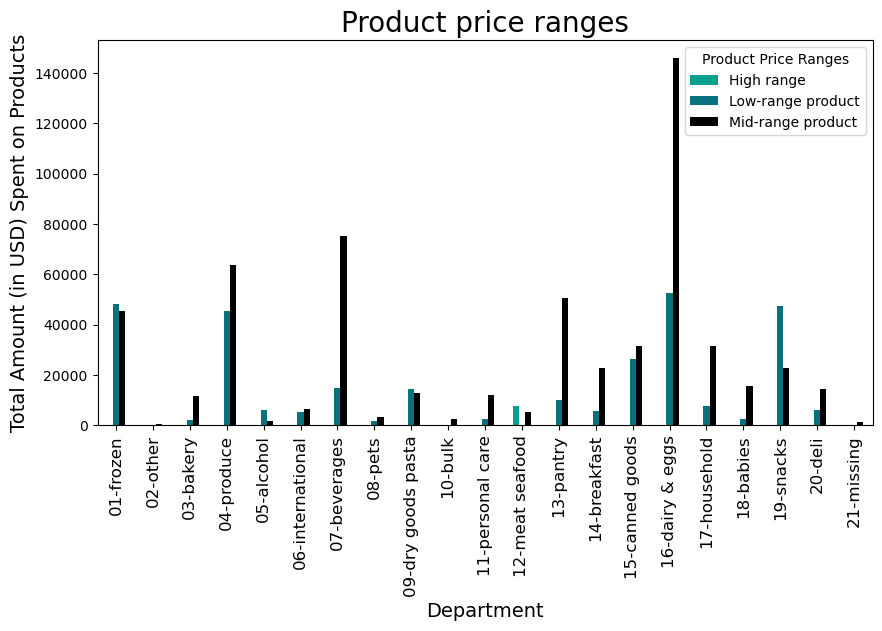

In [64]:
department_prices_bar = department_prices_crosstab.plot(kind = 'bar',figsize=(10,5),color=['#089f8f','#08737f', '#000000']) 
department_prices_bar.legend(title = 'Product Price Ranges') 
plt.title('Product price ranges',fontsize = 20) 
plt.ylabel('Total Amount (in USD) Spent on Products',fontsize=14) 
plt.xlabel('Department',fontsize=14) 
plt.xticks(rotation=90,fontsize=12)

In [65]:
# dropping the unnused columns that have no more use

insta_demo_2 = insta_demo.drop(columns = ['department_id'])

## 4. Exporting the new dataframe

In [67]:
insta_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881215 entries, 0 to 32404763
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 881215 non-null  int64  
 1   gender                  881215 non-null  object 
 2   resident_state          881215 non-null  object 
 3   age                     881215 non-null  int64  
 4   date_joined             881215 non-null  object 
 5   n_dependants            881215 non-null  int64  
 6   fam_status              881215 non-null  object 
 7   income                  881215 non-null  int64  
 8   product_id              881215 non-null  int64  
 9   product_name            881215 non-null  object 
 10  aisle_id                881215 non-null  int64  
 11  department_id           881215 non-null  int64  
 12  prices                  881215 non-null  float64
 13  order_id                881215 non-null  int64  
 14  eval_set               

In [68]:
# extraction of the necessary dataframe

insta_demo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_proj.pkl'))